In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('Resources/acs2019_5yr_B03002_14000US29510104500.geojson')

# Data Exploration

In [3]:
gdf.shape

(106, 45)

In [4]:
gdf.tail()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
101,14000US29510127200,"Census Tract 1272, St. Louis, MO",4243.0,556.0,4186.0,564.0,2554.0,342.0,1208.0,595.0,...,11.0,0.0,11.0,11.0,23.0,11.0,23.0,0.0,11.0,"MULTIPOLYGON (((-90.29184 38.60237, -90.29184 ..."
102,14000US29510127300,"Census Tract 1273, St. Louis, MO",4115.0,375.0,3900.0,424.0,1289.0,176.0,2479.0,409.0,...,11.0,60.0,54.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-90.24539 38.61477, -90.24525 ..."
103,14000US29510127400,"Census Tract 1274, St. Louis, MO",4814.0,924.0,4795.0,924.0,1276.0,334.0,3474.0,1003.0,...,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-90.22629 38.61937, -90.22625 ..."
104,14000US29510127500,"Census Tract 1275, St. Louis, MO",2225.0,221.0,2088.0,217.0,488.0,143.0,1487.0,212.0,...,11.0,13.0,21.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-90.21853 38.63329, -90.21844 ..."
105,14000US29510127600,"Census Tract 1276, St. Louis, MO",2688.0,310.0,2645.0,297.0,2044.0,239.0,535.0,236.0,...,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-90.21346 38.60031, -90.21336 ..."


<AxesSubplot:>

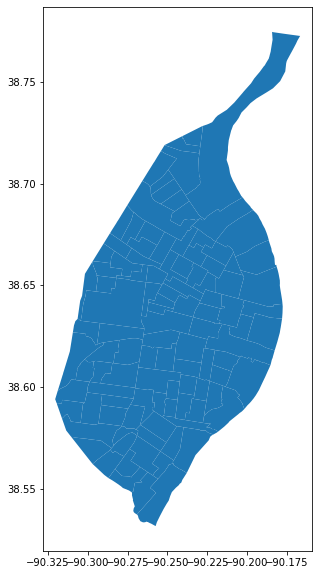

In [5]:
gdf.plot(figsize=(10,10))

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             106 non-null    object  
 1   name              106 non-null    object  
 2   B03002001         106 non-null    float64 
 3   B03002001, Error  106 non-null    float64 
 4   B03002002         106 non-null    float64 
 5   B03002002, Error  106 non-null    float64 
 6   B03002003         106 non-null    float64 
 7   B03002003, Error  106 non-null    float64 
 8   B03002004         106 non-null    float64 
 9   B03002004, Error  106 non-null    float64 
 10  B03002005         106 non-null    float64 
 11  B03002005, Error  106 non-null    float64 
 12  B03002006         106 non-null    float64 
 13  B03002006, Error  106 non-null    float64 
 14  B03002007         106 non-null    float64 
 15  B03002007, Error  106 non-null    float64 
 16  B03002008         

# Data Cleaning

In [4]:
columns_to_keep = ['geoid', 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [5]:
gdf = gdf[columns_to_keep]

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      106 non-null    object  
 1   name       106 non-null    object  
 2   B03002001  106 non-null    float64 
 3   B03002002  106 non-null    float64 
 4   B03002003  106 non-null    float64 
 5   B03002004  106 non-null    float64 
 6   B03002005  106 non-null    float64 
 7   B03002006  106 non-null    float64 
 8   B03002007  106 non-null    float64 
 9   B03002008  106 non-null    float64 
 10  B03002009  106 non-null    float64 
 11  B03002012  106 non-null    float64 
 12  geometry   106 non-null    geometry
dtypes: float64(10), geometry(1), object(2)
memory usage: 10.9+ KB


# Renaming the Columns

In [7]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [8]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US29510101100,"Census Tract 1011, St. Louis, MO",2469.0,2203.0,1878.0,44.0,11.0,54.0,0.0,0.0,216.0,266.0,"MULTIPOLYGON (((-90.28704 38.55544, -90.28695 ..."
1,14000US29510101200,"Census Tract 1012, St. Louis, MO",3408.0,3341.0,2800.0,228.0,0.0,313.0,0.0,0.0,0.0,67.0,"MULTIPOLYGON (((-90.28291 38.55984, -90.28262 ..."
2,14000US29510101300,"Census Tract 1013, St. Louis, MO",4085.0,4062.0,3108.0,682.0,0.0,208.0,0.0,0.0,64.0,23.0,"MULTIPOLYGON (((-90.27362 38.56990, -90.27331 ..."
3,14000US29510101400,"Census Tract 1014, St. Louis, MO",2844.0,2807.0,1482.0,1020.0,0.0,94.0,129.0,33.0,49.0,37.0,"MULTIPOLYGON (((-90.25961 38.56250, -90.25946 ..."
4,14000US29510101500,"Census Tract 1015, St. Louis, MO",3160.0,3044.0,1456.0,1465.0,14.0,28.0,0.0,30.0,51.0,116.0,"MULTIPOLYGON (((-90.27272 38.54859, -90.27224 ..."


# Checking Data Integrity

In [9]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
19,14000US29510105200,"Census Tract 1052, St. Louis, MO",2689.0,2571.0,938.0,1292.0,36.0,151.0,0.0,0.0,154.0,118.0,"MULTIPOLYGON (((-90.29462 38.64858, -90.29460 ..."


In [10]:
# 'for the 0th record/row, get the value in the Total Column'
random_tract.iloc[0]['Total']

2689.0

In [11]:
print('Total Population: ' + str(random_tract.iloc[0]['Total']))

Total Population: 2689.0


# Creating the first plot

<AxesSubplot:ylabel='Frequency'>

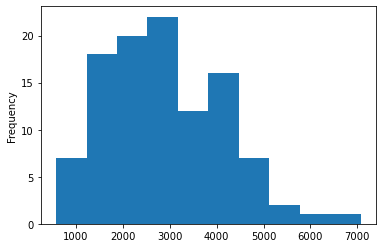

In [13]:
# plotting as a histogram
gdf['Total'].plot.hist()

<AxesSubplot:title={'center':"St. Louis' census tracts by population size (ACS 2019 5-year)"}, ylabel='Frequency'>

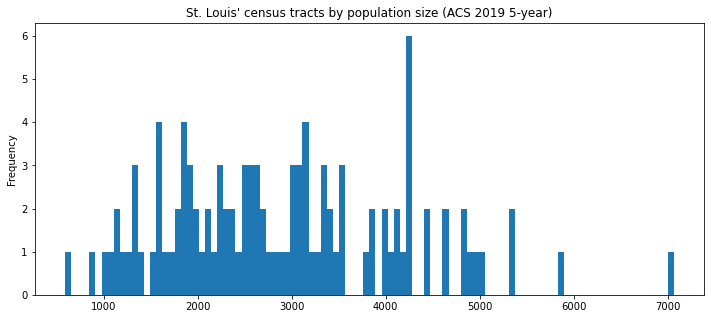

In [14]:
# making it bigger, increasing the number of bins, and giving it a title
gdf['Total'].plot.hist(figsize=(12,5),
                       bins=100,
                       title="St. Louis' census tracts by population size (ACS 2019 5-year)")

# Sorting
What are the top 10 most populated census tracts?

In [15]:
gdf_sorted = gdf.sort_values(by='Total', ascending=False)
gdf_sorted.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
63,14000US29510115500,"Census Tract 1155, St. Louis, MO",7066.0,6383.0,1092.0,5224.0,0.0,0.0,0.0,0.0,67.0,683.0,"MULTIPOLYGON (((-90.25439 38.56855, -90.25360 ..."
7,14000US29510102200,"Census Tract 1022, St. Louis, MO",5880.0,5758.0,5543.0,146.0,0.0,68.0,0.0,0.0,1.0,122.0,"MULTIPOLYGON (((-90.31624 38.58469, -90.31620 ..."
58,14000US29510114300,"Census Tract 1143, St. Louis, MO",5348.0,5176.0,4700.0,263.0,0.0,99.0,0.0,0.0,114.0,172.0,"MULTIPOLYGON (((-90.29332 38.58212, -90.29331 ..."
93,14000US29510125600,"Census Tract 1256, St. Louis, MO",5336.0,5154.0,2129.0,2469.0,15.0,402.0,0.0,0.0,139.0,182.0,"MULTIPOLYGON (((-90.20004 38.62302, -90.19968 ..."
61,14000US29510115300,"Census Tract 1153, St. Louis, MO",5007.0,4354.0,1780.0,1774.0,30.0,572.0,0.0,0.0,198.0,653.0,"MULTIPOLYGON (((-90.26691 38.58149, -90.26663 ..."


In [16]:
# displaying the data, but just a few columns to keep it clean
gdf_sorted[['geoid', 'Total']].head(10)

,geoid,Total
63,14000US29510115500,7066.0
7,14000US29510102200,5880.0
58,14000US29510114300,5348.0
93,14000US29510125600,5336.0
61,14000US29510115300,5007.0
73,14000US29510117200,4953.0
70,14000US29510116400,4879.0
64,14000US29510115600,4857.0
103,14000US29510127400,4814.0
59,14000US29510115100,4648.0


<AxesSubplot:>

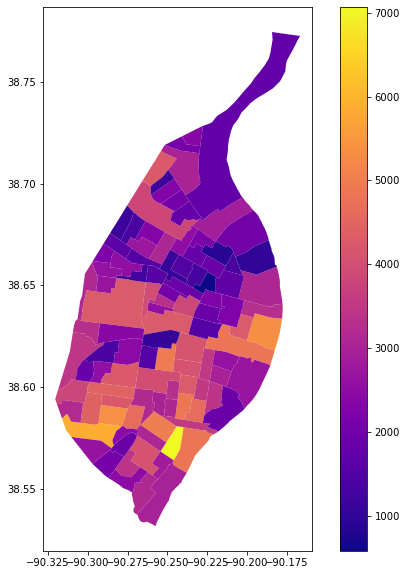

In [17]:
gdf_sorted.plot(figsize=(10,10),
                column='Total',
                cmap='plasma',
                legend=True)

# Filtering and subsetting data
What are the census tracts with the highest Asian population? Which census tract doesn't have any Asian population?

In [18]:
gdf[gdf['Non Hispanic Asian']==0]

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
5,14000US29510101800,"Census Tract 1018, St. Louis, MO",2976.0,2675.0,1693.0,869.0,25.0,0.0,0.0,0.0,88.0,301.0,"MULTIPOLYGON (((-90.26906 38.53761, -90.26900 ..."
6,14000US29510102100,"Census Tract 1021, St. Louis, MO",2642.0,2599.0,2137.0,285.0,49.0,0.0,0.0,9.0,119.0,43.0,"MULTIPOLYGON (((-90.31027 38.57563, -90.31021 ..."
9,14000US29510102400,"Census Tract 1024, St. Louis, MO",2482.0,2431.0,2152.0,225.0,0.0,0.0,0.0,0.0,54.0,51.0,"MULTIPOLYGON (((-90.28452 38.57405, -90.28448 ..."
21,14000US29510105400,"Census Tract 1054, St. Louis, MO",2230.0,2032.0,239.0,1655.0,0.0,0.0,0.0,28.0,110.0,198.0,"MULTIPOLYGON (((-90.29688 38.66197, -90.29616 ..."
23,14000US29510106100,"Census Tract 1061, St. Louis, MO",1623.0,1612.0,26.0,1577.0,0.0,0.0,0.0,0.0,9.0,11.0,"MULTIPOLYGON (((-90.29005 38.67058, -90.28941 ..."
24,14000US29510106200,"Census Tract 1062, St. Louis, MO",1142.0,1126.0,34.0,1068.0,0.0,0.0,0.0,0.0,24.0,16.0,"MULTIPOLYGON (((-90.28603 38.67565, -90.28582 ..."
25,14000US29510106300,"Census Tract 1063, St. Louis, MO",1352.0,1352.0,5.0,1333.0,0.0,0.0,0.0,0.0,14.0,0.0,"MULTIPOLYGON (((-90.27928 38.67222, -90.27927 ..."
26,14000US29510106400,"Census Tract 1064, St. Louis, MO",2328.0,2328.0,0.0,2253.0,0.0,0.0,0.0,0.0,75.0,0.0,"MULTIPOLYGON (((-90.27037 38.67249, -90.27010 ..."
27,14000US29510106500,"Census Tract 1065, St. Louis, MO",2745.0,2718.0,132.0,2486.0,0.0,0.0,0.0,0.0,100.0,27.0,"MULTIPOLYGON (((-90.27517 38.67067, -90.27506 ..."
29,14000US29510106700,"Census Tract 1067, St. Louis, MO",3103.0,3091.0,2.0,3077.0,0.0,0.0,0.0,0.0,12.0,12.0,"MULTIPOLYGON (((-90.26155 38.66306, -90.26135 ..."


In [19]:
gdf_no_asians = gdf[gdf['Non Hispanic Asian']==0]
print('There are ' + str(len(gdf_no_asians)) + ' census tracts with no Asians in them.')

There are 42 census tracts with no Asians in them.


In [20]:
# Display it
gdf_no_asians[['geoid', 'Non Hispanic Asian']]

,geoid,Non Hispanic Asian
5,14000US29510101800,0.0
6,14000US29510102100,0.0
9,14000US29510102400,0.0
21,14000US29510105400,0.0
23,14000US29510106100,0.0
24,14000US29510106200,0.0
25,14000US29510106300,0.0
26,14000US29510106400,0.0
27,14000US29510106500,0.0
29,14000US29510106700,0.0


# Normalizing the data

In [21]:
# output columns
list(gdf)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [22]:
# Creating a new column, and populate it with normalized data to get the percent of total value
gdf['Percent Non Hispanic Asian'] = gdf['Non Hispanic Asian']/gdf['Total']*100
gdf[['geoid', 'Percent Non Hispanic Asian']]

,geoid,Percent Non Hispanic Asian
0,14000US29510101100,2.187120
1,14000US29510101200,9.184272
2,14000US29510101300,5.091799
3,14000US29510101400,3.305204
4,14000US29510101500,0.886076
...,...,...
101,14000US29510127200,7.848221
102,14000US29510127300,2.017011
103,14000US29510127400,0.934774
104,14000US29510127500,0.000000


In [23]:
gdf[['geoid', 'Percent Non Hispanic Asian']].sort_values(by='Percent Non Hispanic Asian', ascending=False)

,geoid,Percent Non Hispanic Asian
69,14000US29510116302,24.911944
81,14000US29510119300,14.975471
18,14000US29510105198,14.472010
8,14000US29510102300,13.694722
17,14000US29510104500,13.255034
...,...,...
49,14000US29510111500,0.000000
47,14000US29510111300,0.000000
46,14000US29510111200,0.000000
45,14000US29510111100,0.000000
